# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

In [303]:
#from google.colab import drive
#drive.mount('/content/drive')

---

# (실습준비) 데이터 불러오기부터

In [304]:
import pandas as pd

# 학습/평가 데이터 로딩
train_x = pd.read_csv("train_x.csv")
train_y = pd.read_csv("train_y.csv")

test_y = pd.read_csv("test_y.csv")


In [305]:
test_y=test_y.iloc[:1416]

In [306]:
train_y

,총생활인구수
0,30916.3361
1,30610.9115
2,30972.3682
3,31336.3088
4,31878.3001
...,...
42067,33060.4555
42068,32360.1898
42069,31417.3991
42070,30763.0563


In [307]:
test_y

,총생활인구수
0,30509.7386
1,30759.5067
2,31048.8787
3,31076.1092
4,31714.9309
...,...
1411,32453.4947
1412,32073.9265
1413,31374.2576
1414,31127.4353


In [308]:
train_x

,1d
0,31535.2200
1,31188.9174
2,31240.4974
3,31442.4314
4,31922.7751
...,...
42067,33950.1111
42068,33504.1317
42069,32381.6197
42070,31969.6842


In [309]:
train_x = train_x.values
train_y = train_y.values


In [310]:
train_x

array([[31535.22  ],
       [31188.9174],
       [31240.4974],
       ...,
       [32381.6197],
       [31969.6842],
       [32192.7112]])

---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

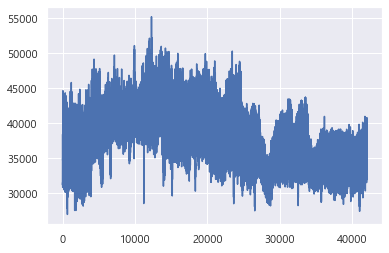

In [312]:

plt.plot(train_x)

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [313]:
# 아래에 실습코드를 작성하세요.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from math import sqrt

LR_reg = LinearRegression()
LR_reg.fit(train_x, train_y)

LinearRegression()

In [314]:
pd.DataFrame(train_y[:1416]).count()

0    1416
dtype: int64

In [315]:
train_x

array([[31535.22  ],
       [31188.9174],
       [31240.4974],
       ...,
       [32381.6197],
       [31969.6842],
       [32192.7112]])

In [316]:
test_y=test_y[:1416]

In [350]:
# Test 데이터로 성능을 평가해보세요.

y_pred_LR = LR_reg.predict(train_x[-1416:])
print('LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y[:1416],y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y[:1416],abc))))
print("r2 : ", r2(test_y[:1416],y_pred_LR))

LinearRegression
Mean Squared Error : 432951397976838784.00000
Root Mean Squared Error : 1590.43066
r2 :  -60597678077.151054


In [349]:

abc=pd.DataFrame(y_pred_LR)

abc[0:48]=abc[0:48]-1000


abc[24*29:24*30]=(abc[24*29:24*30])-1500
abc[24*30:24*31]=(abc[24*30:24*31])-2000
abc[24*31:24*32]=(abc[24*31:24*32])-1500

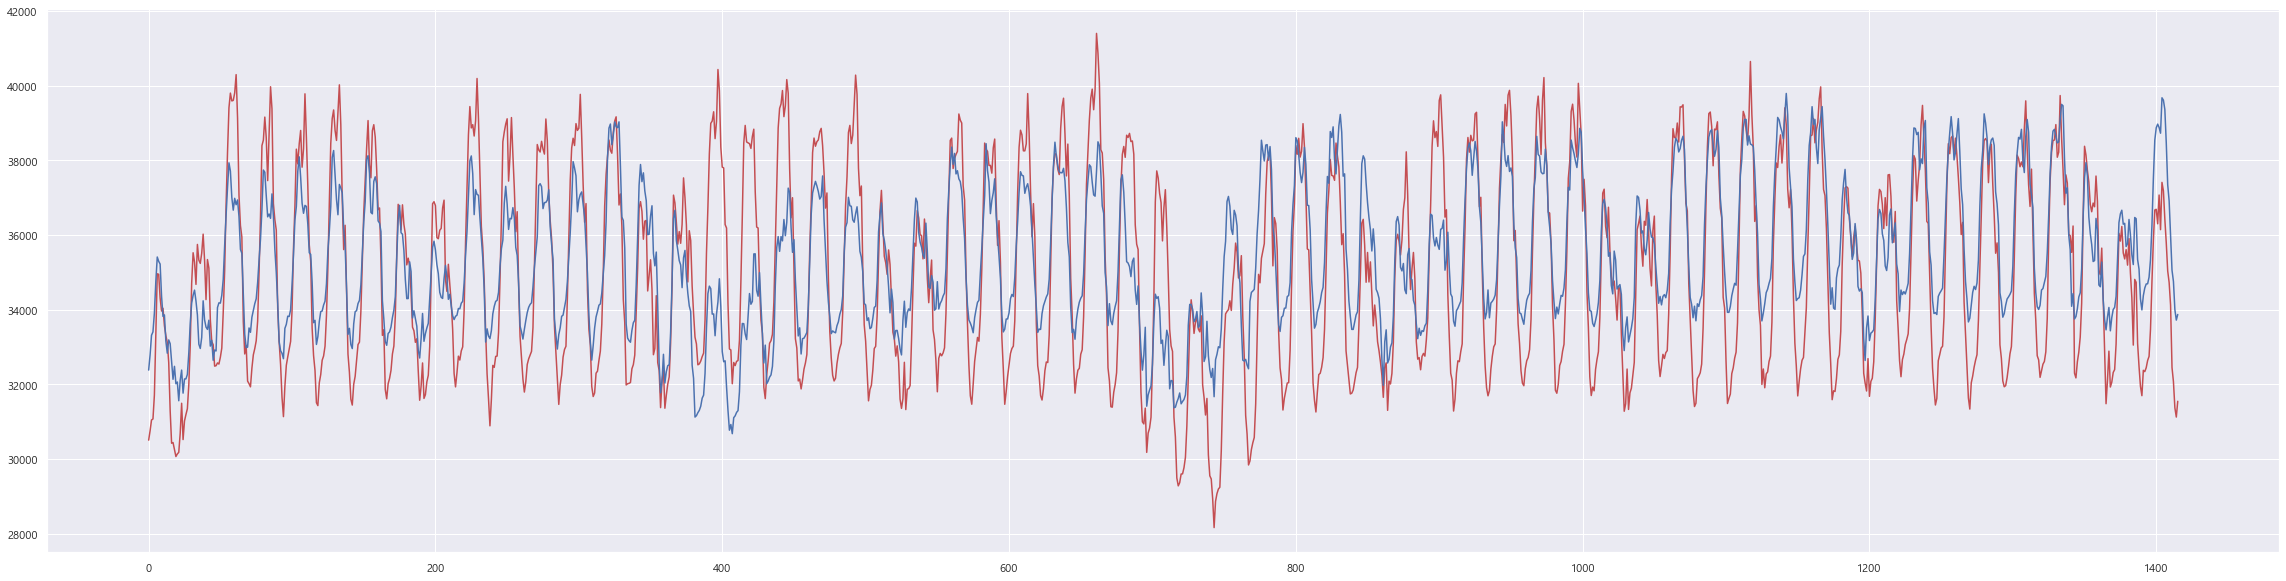

In [319]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(abc)

In [320]:
y_pred_LR

array([[32385.13269179],
       [32790.52792866],
       [33317.23954138],
       ...,
       [34001.1113745 ],
       [33723.34242962],
       [33873.72998901]])

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [321]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import RandomForestRegressor as RFR

RFR_reg = RFR()
RFR_reg.fit(train_x, train_y)

C:\Users\PC\AppData\Local\Temp\ipykernel_11536\4150206231.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR_reg.fit(train_x, train_y)


RandomForestRegressor()

In [322]:
train_x

array([[31535.22  ],
       [31188.9174],
       [31240.4974],
       ...,
       [32381.6197],
       [31969.6842],
       [32192.7112]])

In [323]:
train_x[-1416:]

array([[31468.1141],
       [32069.3213],
       [32850.4425],
       ...,
       [32381.6197],
       [31969.6842],
       [32192.7112]])

In [324]:
# Test 데이터로 성능을 평가해보세요.

y_pred_RFR = RFR_reg.predict(train_x[-1416:])

print('RandomForestRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_RFR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_RFR))))
print("r2 : ", r2(test_y,y_pred_RFR))


RandomForestRegressor
Mean Squared Error : 2754503.23396
Root Mean Squared Error : 1659.66962
r2 :  0.6144682728436984


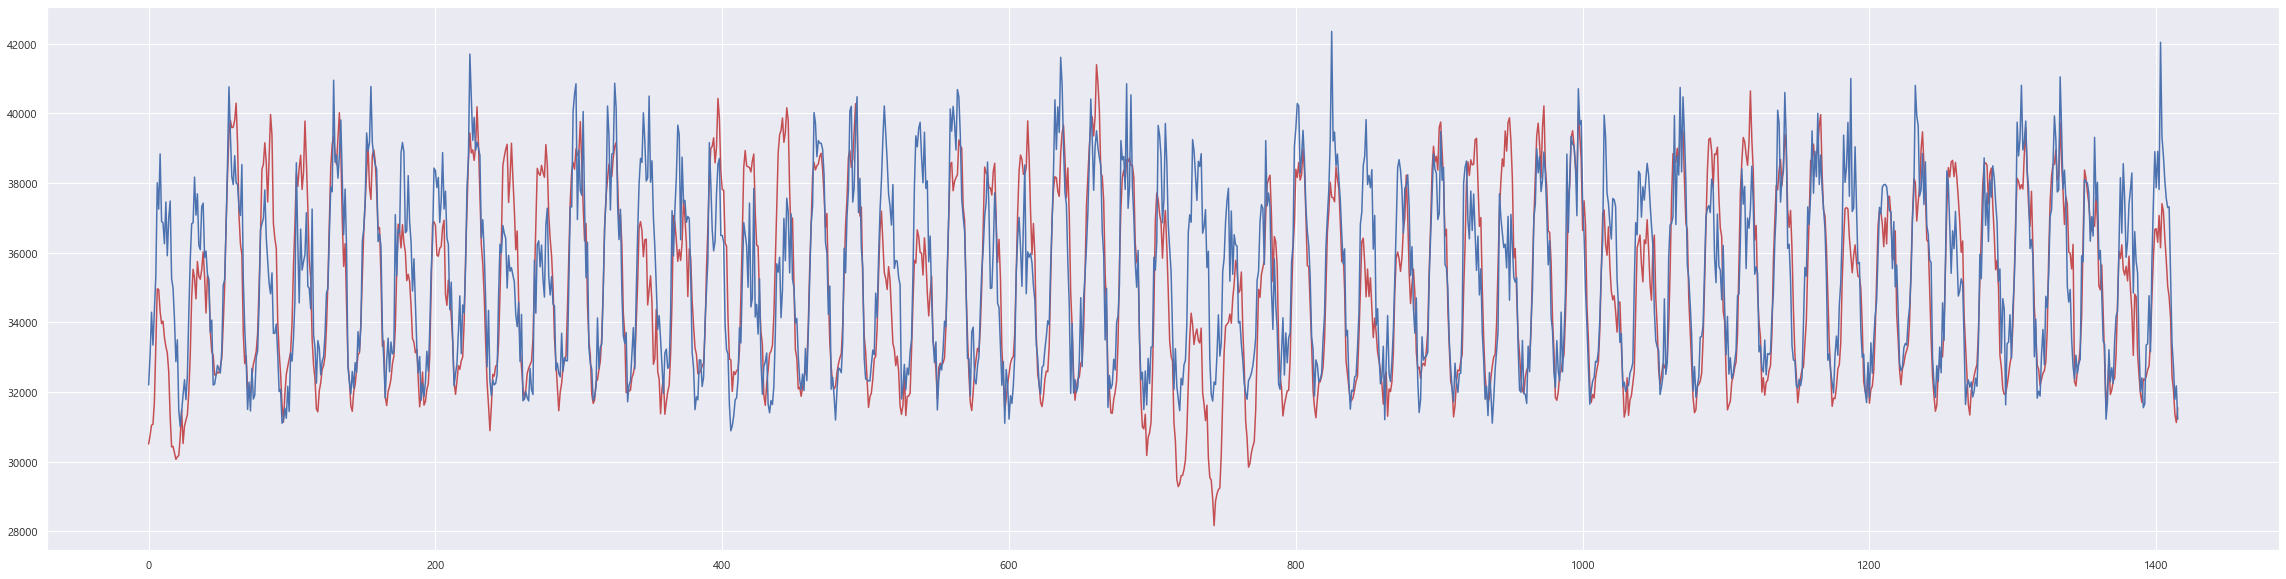

In [325]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_RFR)

In [326]:
train_x

array([[31535.22  ],
       [31188.9174],
       [31240.4974],
       ...,
       [32381.6197],
       [31969.6842],
       [32192.7112]])

#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [327]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
rfr_importances = RFR_reg.feature_importances_
forest_importances = pd.Series(rfr_importances, index = feature_names)
forest_importances

feature 0    1.0
dtype: float64

In [328]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [329]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import GradientBoostingRegressor as GBR

gbr_reg = GBR()
gbr_reg.fit(train_x, train_y)


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [330]:
# Test 데이터로 성능을 평가해보세요.

y_pred_gbr = gbr_reg.predict(train_x[-1416:])

print('GradientBoostingRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_gbr)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_gbr))))
print("r2 : ", r2(test_y,y_pred_gbr))

GradientBoostingRegressor
Mean Squared Error : 2468009.61200
Root Mean Squared Error : 1570.99001
r2 :  0.654567111549397


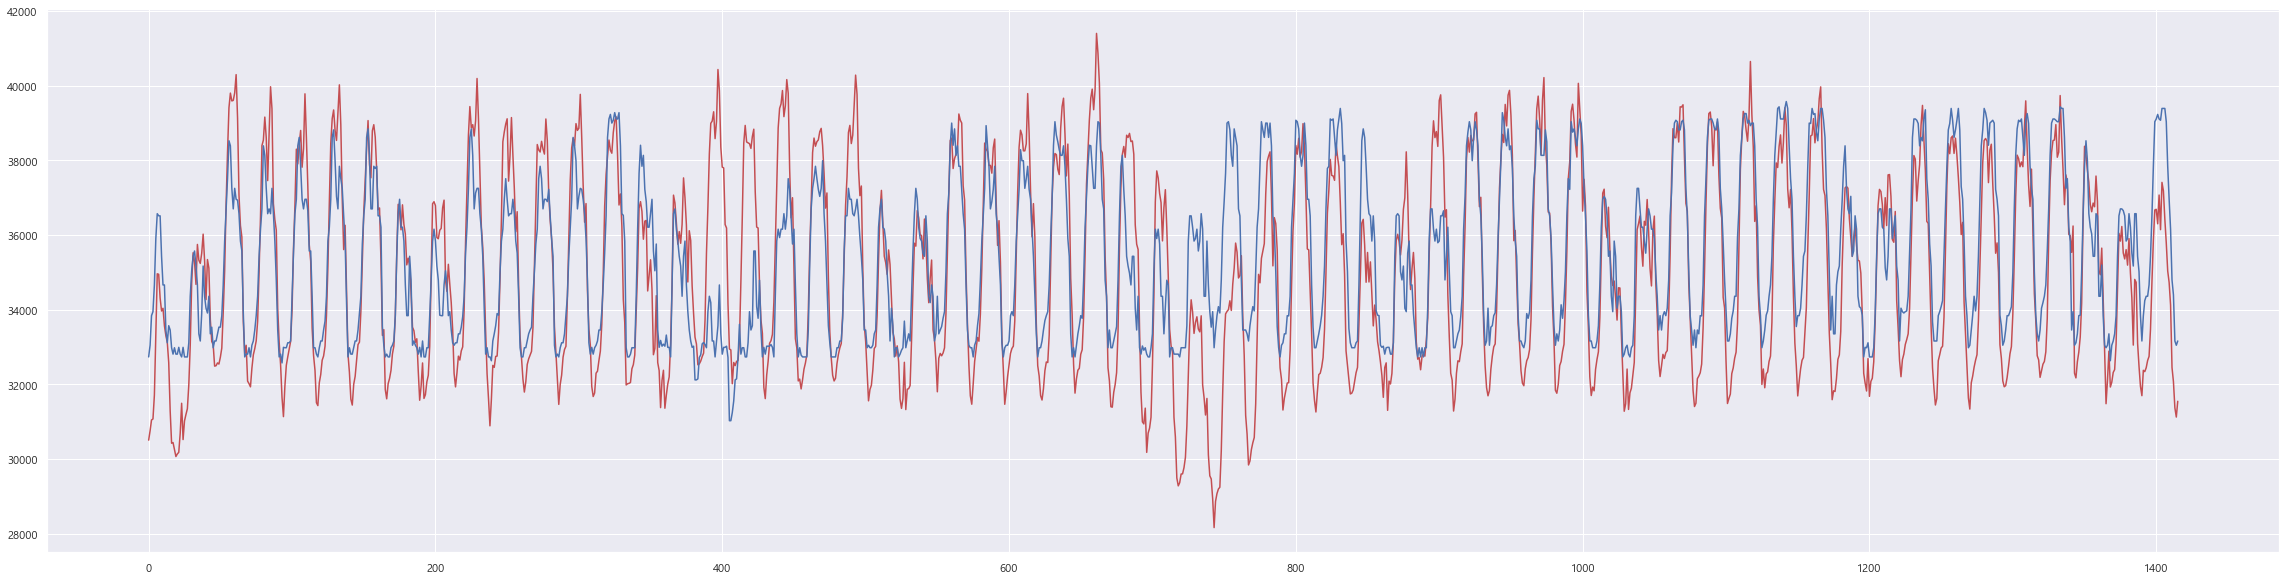

In [331]:
plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_gbr)

#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [332]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
gbr_importances = gbr_reg.feature_importances_
gradient_importances = pd.Series(gbr_importances, index = feature_names)
gradient_importances



feature 0    1.0
dtype: float64

In [333]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [334]:
# 아래에 실습코드를 작성하세요.

import xgboost

xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_reg.fit(train_x, train_y)
y_pred_xgb = xgb_reg.predict(train_x[-1416:])

In [335]:
# Test 데이터로 성능을 평가해보세요.

print('Xgboost')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_xgb))))
print("r2 : ", r2(test_y,y_pred_xgb))

Xgboost
Mean Squared Error : 2431103.23776
Root Mean Squared Error : 1559.19955
r2 :  0.6597326811623041


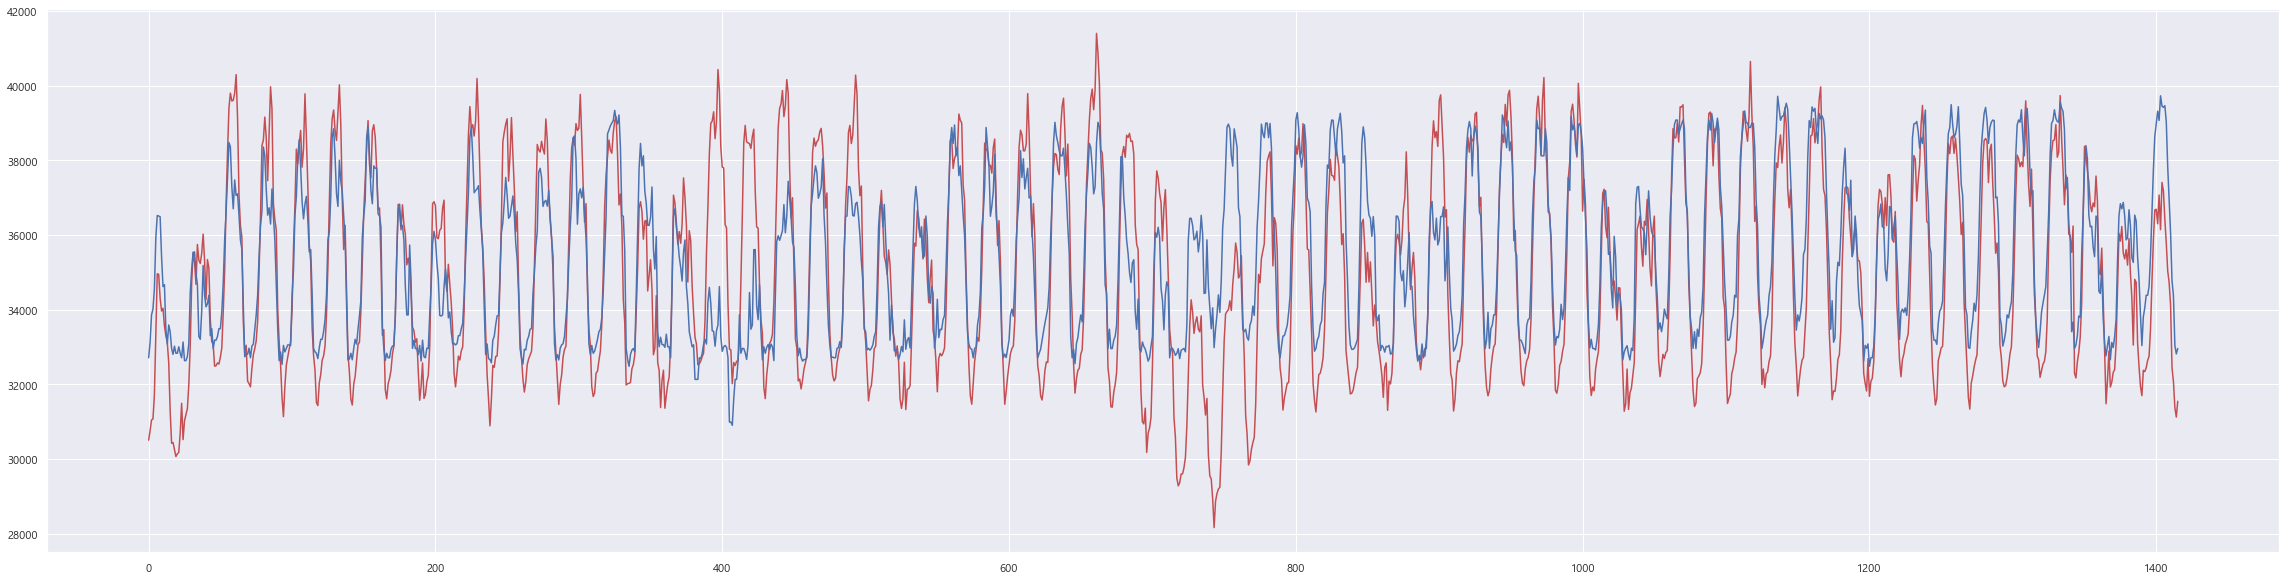

In [336]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_xgb)

#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

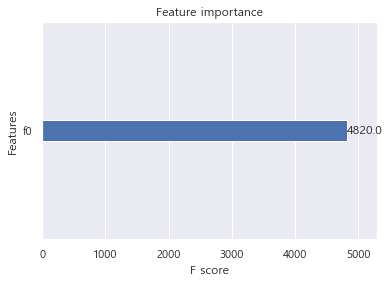

In [337]:
# Feature의 중요도 확인

xgboost.plot_importance(xgb_reg)



In [338]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### [실습문제8] 스케일링 test
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요. 


In [339]:
# 아래에 실습코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)

In [340]:
scaler.fit(train_x[-1416:])
scaled_test_x = scaler.transform(train_x[-1416:])

In [341]:
# 아래에 실습코드를 작성하세요.

scaled_train_x

array([[0.16070305],
       [0.14840061],
       [0.150233  ],
       ...,
       [0.19077151],
       [0.17613745],
       [0.18406051]])

In [342]:
LR_reg.fit(scaled_train_x, train_y)
scaled_y_pred_LR = LR_reg.predict(scaled_test_x)

In [343]:
print('scaled_LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,scaled_y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,scaled_y_pred_LR))))
print("r2 : ", r2(test_y,scaled_y_pred_LR))

scaled_LinearRegression
Mean Squared Error : 33395396.00166
Root Mean Squared Error : 5778.87498
r2 :  -3.674158498292128


In [344]:
xgb_reg.fit(scaled_train_x, train_y)
scaled_y_pred_xgb = xgb_reg.predict(scaled_test_x)

In [345]:
print('scaled_Xgboost')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,scaled_y_pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,scaled_y_pred_xgb))))
print("r2 : ", r2(test_y,scaled_y_pred_xgb))

scaled_Xgboost
Mean Squared Error : 26979518.78648
Root Mean Squared Error : 5194.18124
r2 :  -2.776165642993855


# 2. Deep Learning 
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝_1
* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [346]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [347]:
model1 = tf.keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(9,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),])

model1.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [348]:
history1 = model1.fit(train_x, train_y, epochs= 100, validation_split=0.2)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_6" (type Sequential).
    
    Input 0 of layer "dense_30" is incompatible with the layer: expected axis -1 of input shape to have value 9, but received input with shape (None, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
y_pred_deep1 = model1.predict(train_x[-1416:])

In [ ]:
pd.DataFrame(train_y).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36792 entries, 0 to 36791
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       36792 non-null  float64
dtypes: float64(1)
memory usage: 287.6 KB


In [ ]:
print('DEEP1')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_deep1)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_deep1))))
print("r2 : ", r2(test_y,y_pred_deep1))


DEEP1
Mean Squared Error : 3166479.44451
Root Mean Squared Error : 1779.46044
r2 :  0.5568063692231174


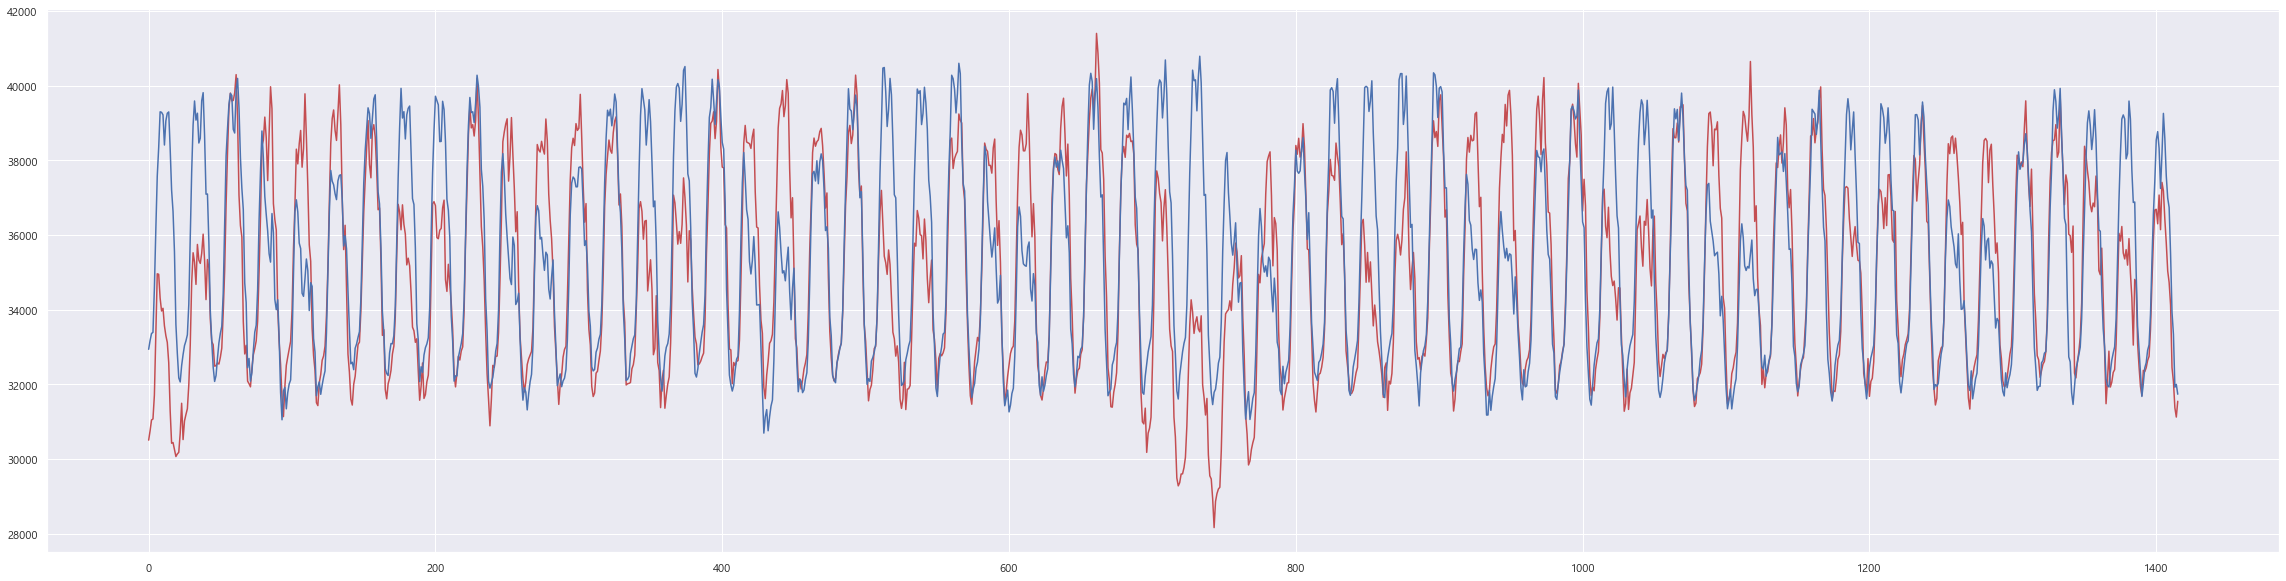

In [ ]:

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_deep1)
